In [1]:
import pandas as pd

# Replace the path with the actual path to your CSV file
file_path = "C:/Users/91638/Downloads/mcdonalds.csv"
# Read the CSV file into a DataFrame
mcdonalds = pd.read_csv(file_path)

# Display the names of the variables in the dataset
print(mcdonalds.columns)

# Check the dimensions of the DataFrame
print(mcdonalds.shape)

# Display the first 3 rows of the DataFrame
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Replace the path with the actual path to your CSV file
file_path = "C:/Users/91638/Downloads/mcdonalds.csv"
# Read the CSV file into a DataFrame
mcdonalds = pd.read_csv(file_path)

# Extract the segmentation variables and convert them to a matrix
MD_x = mcdonalds.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)

# Check the average values of the transformed binary numeric segmentation variables
avg_values = round(MD_x.mean(), 2)
print("Average Values of Transformed Binary Numeric Segmentation Variables:")
print(avg_values)


# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)



# Calculate standard deviations from eigenvalues
standard_deviations = np.sqrt(MD_pca.explained_variance_)


# Display a summary of the PCA results
explained_variance_ratio = MD_pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("\nStandard Deviations:")
print(standard_deviations)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Assuming MD_pca is a result of PCA
standard_deviations = np.round(np.sqrt(MD_pca.explained_variance_), 1)
print("Standard deviations (1, .., p=11):")
print(standard_deviations)

# Display factor loadings with variable names
factor_loadings = pd.DataFrame(MD_pca.components_.T, columns=[f'PC{i+1}' for i in range(MD_pca.components_.shape[0])], index=MD_x.columns)
print("\nFactor Loadings:")
print(factor_loadings)


Average Values of Transformed Binary Numeric Segmentation Variables:
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

Standard Deviations:
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]

Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Explained Variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Factor Loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
conveni

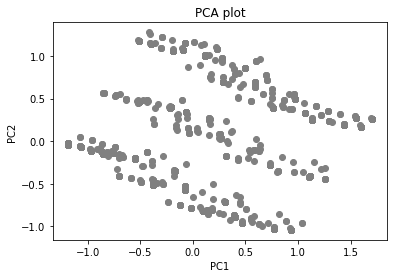

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_pca is a result of PCA
pca = PCA()
pca.fit(MD_x)

# Get the transformed data
transformed_data = pca.transform(MD_x)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()


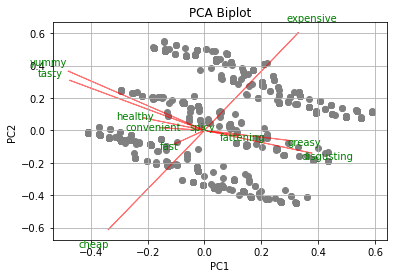

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_pca is a result of PCA
pca = PCA()
pca.fit(MD_x)

# Get the transformed data
transformed_data = pca.transform(MD_x)

# Convert the transformed data to a DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])

# Create a biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c='grey')

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

# Call the function
biplot(transformed_data[:, :2], np.transpose(pca.components_[:2, :]), labels=MD_x.columns)

# Customize the plot
plt.title('PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


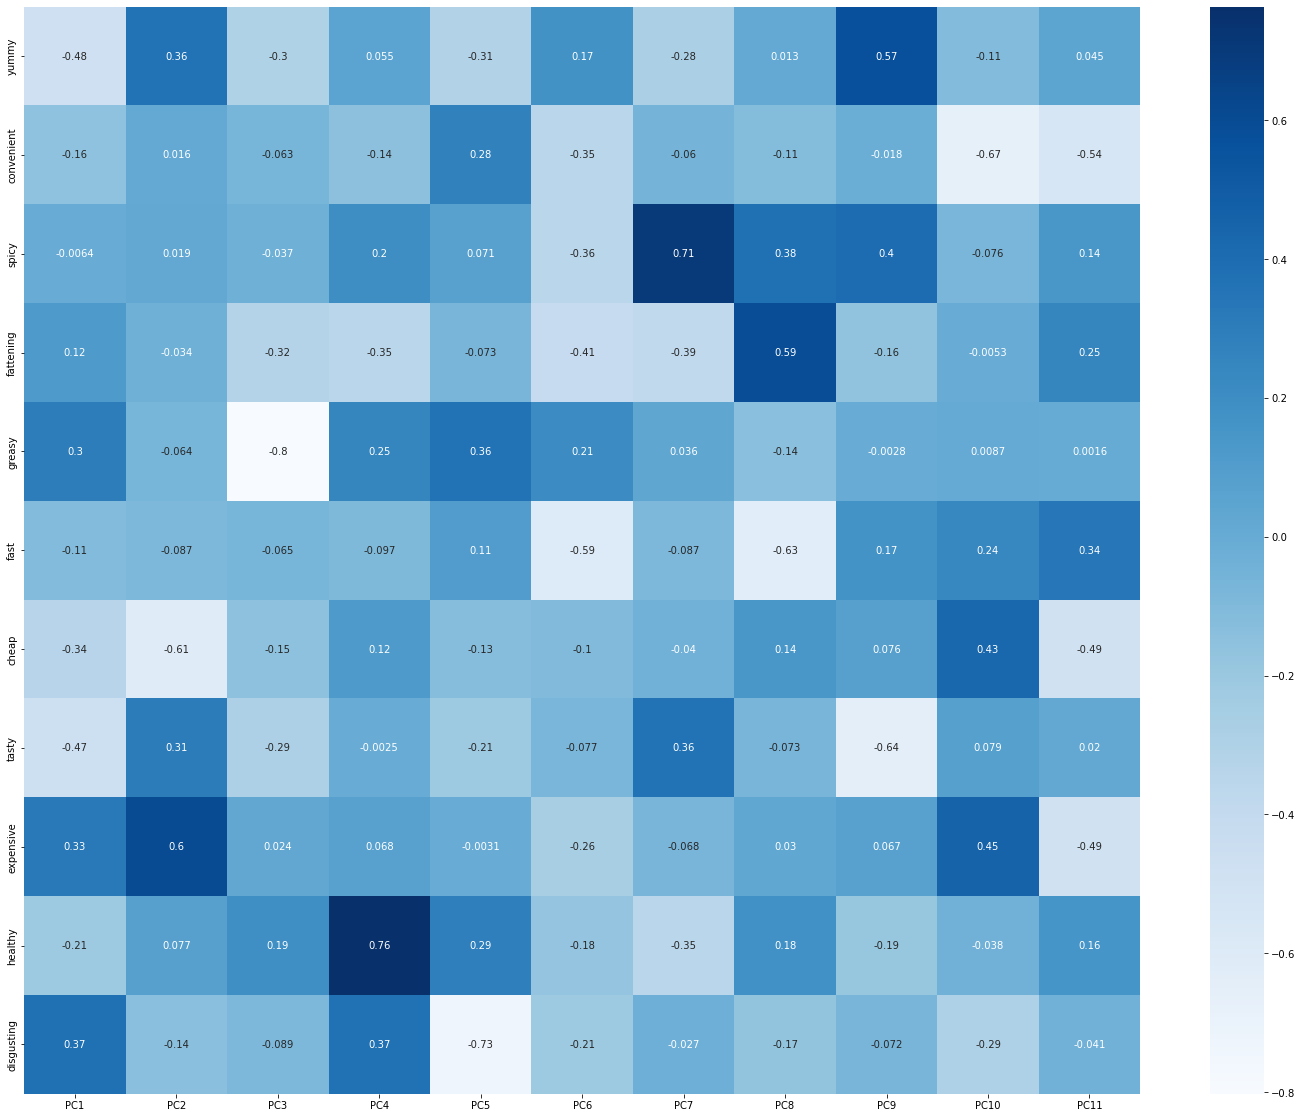

In [8]:
# correlation matrix plot for loadings 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25,20)
ax = sns.heatmap(factor_loadings, annot=True, cmap='Blues')
plt.show()



# Step 5: Extracting Segments

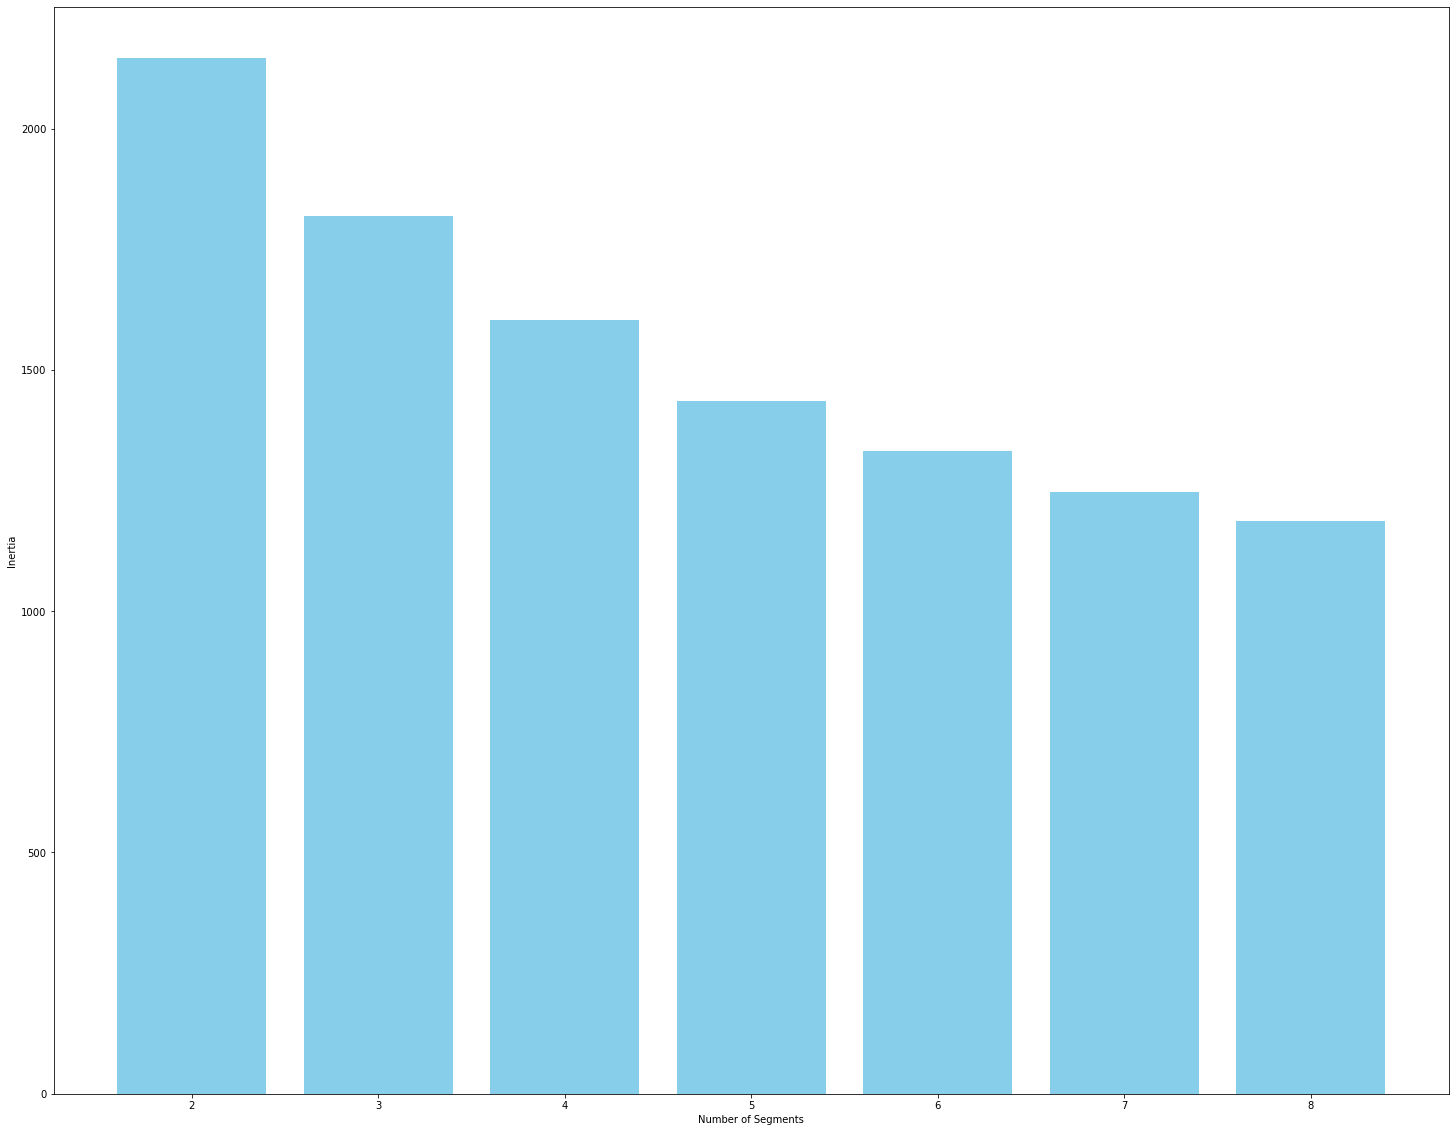

In [9]:

from sklearn.cluster import KMeans

# Set seed
np.random.seed(1234)

# Number of clusters to consider
n_clusters_range = range(2, 9)

# Perform k-means analysis with ten random restarts for each number of clusters
inertia_values = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot scree plot as a bar plot
plt.figure()
plt.bar(n_clusters_range, inertia_values, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.show()


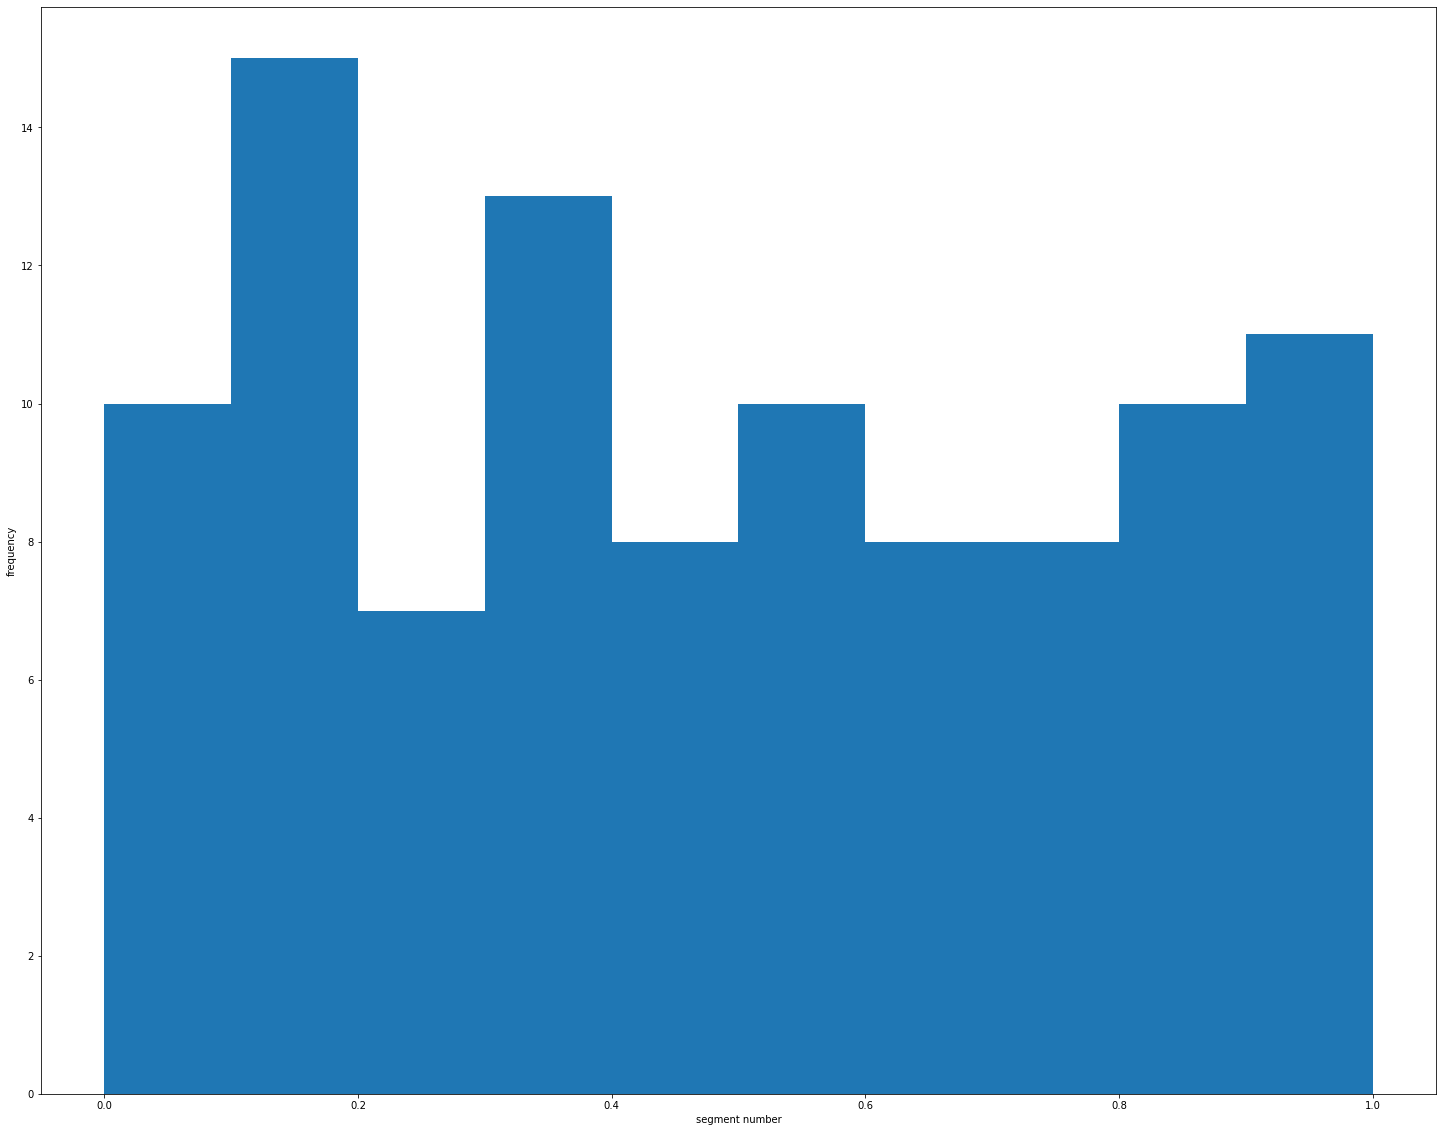

In [14]:

# Plotting histogram of the four-segment solution
plt.hist(MD_x[:,3], bins=10, range=(0,1))
plt.xlabel('segment number')
plt.ylabel('frequency')
plt.show()


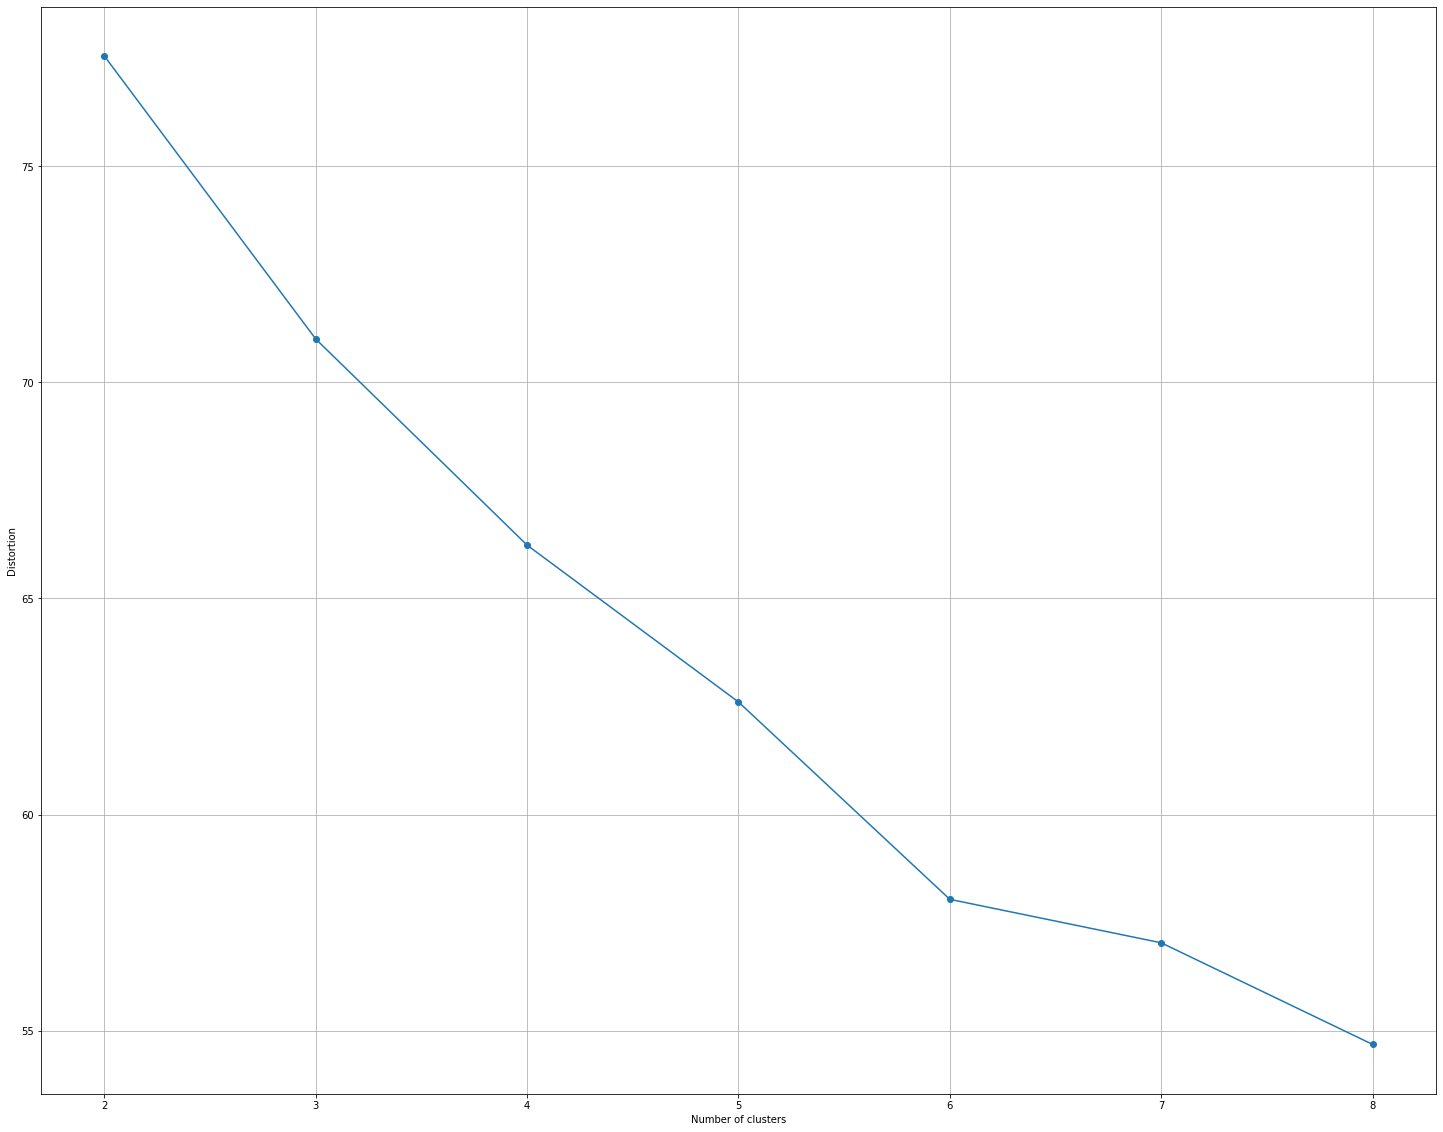

In [24]:

# Extract 2-8 segments with KMeans
kmeans = []
for n_clusters in range(2,9):
    kmeans.append(KMeans(n_clusters=n_clusters, random_state=123).fit(MD_x))

# Plot elbow curve
distortions = [kmeans[i].inertia_ for i in range(len(kmeans))]
plt.plot(range(2,9), distortions, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()

#

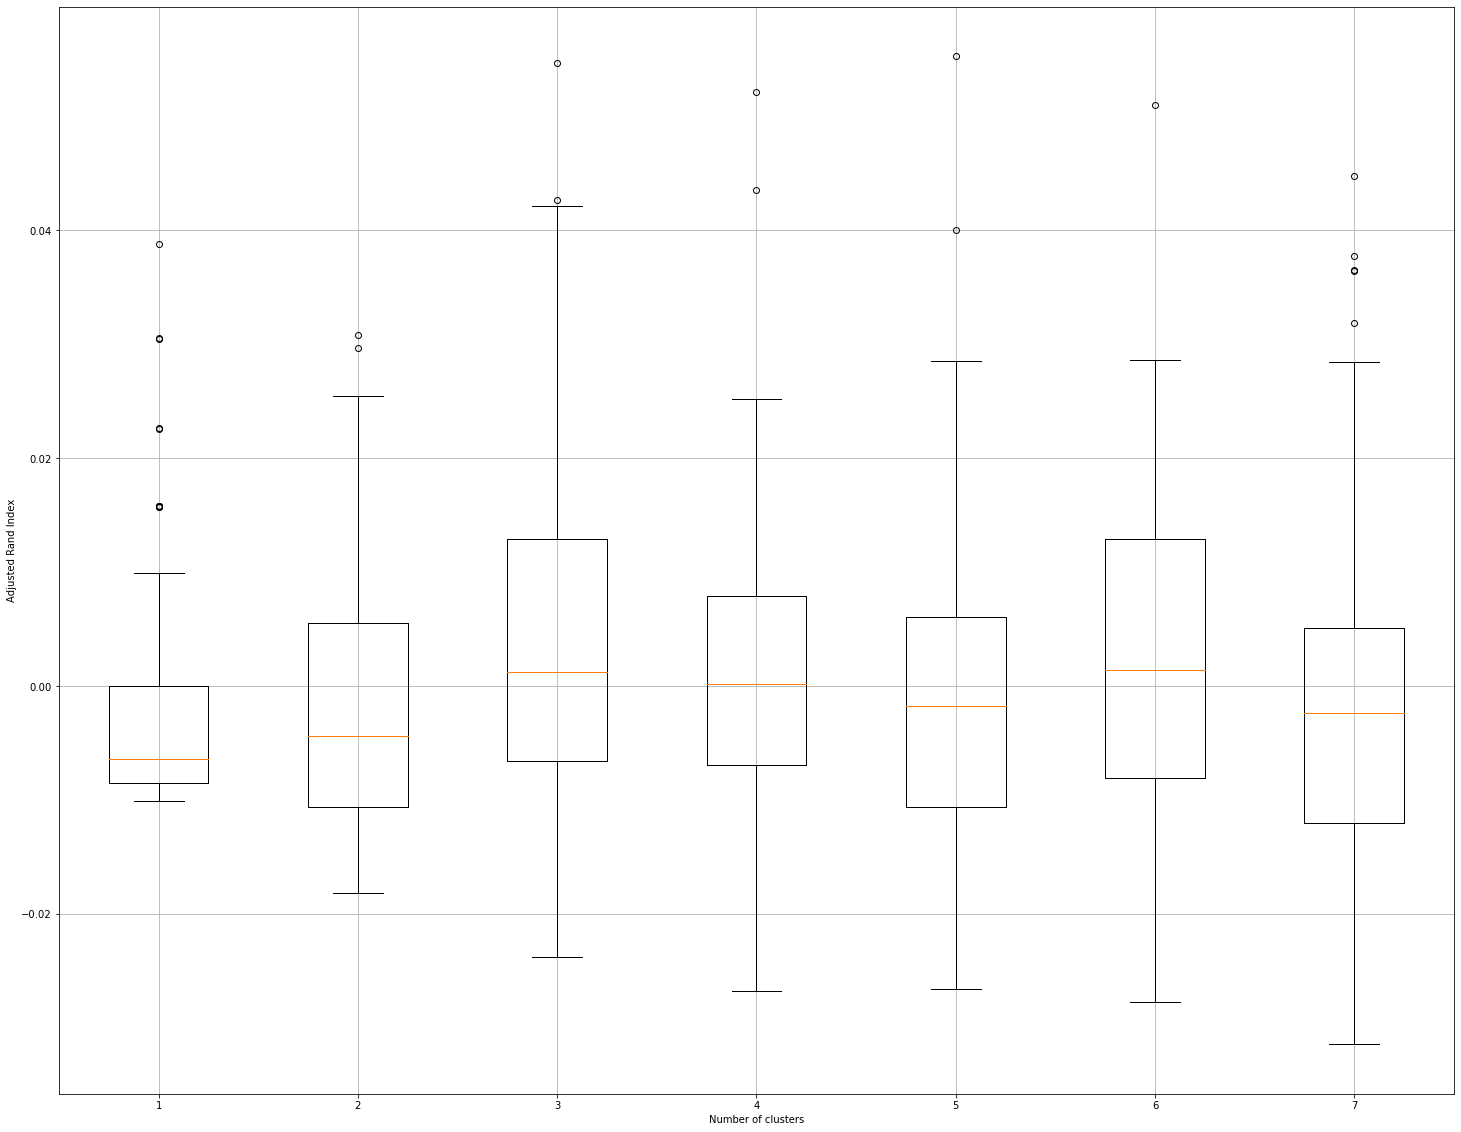

In [31]:
from sklearn import metrics
n_bootstrap = 100
n_clusters = range(2,9)
stabilities = []

for n_cluster in n_clusters:
    sample_stability = []
    
    for i in range(n_bootstrap):
      
        # Choose random sample
        bootstrap_sample = MD_x[np.random.choice(MD_x.shape[0], MD_x.shape[0], replace=True),:]
        
        # Cluster sample and assess stability
        model = KMeans(n_clusters=n_cluster, random_state=123).fit(bootstrap_sample)
        labels = model.labels_
        sample_stability.append(metrics.adjusted_rand_score(labels, kmeans[n_cluster-2].labels_))
        
    stabilities.append(sample_stability)
# Plot stability    
plt.boxplot(stabilities)
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted Rand Index')
plt.grid()





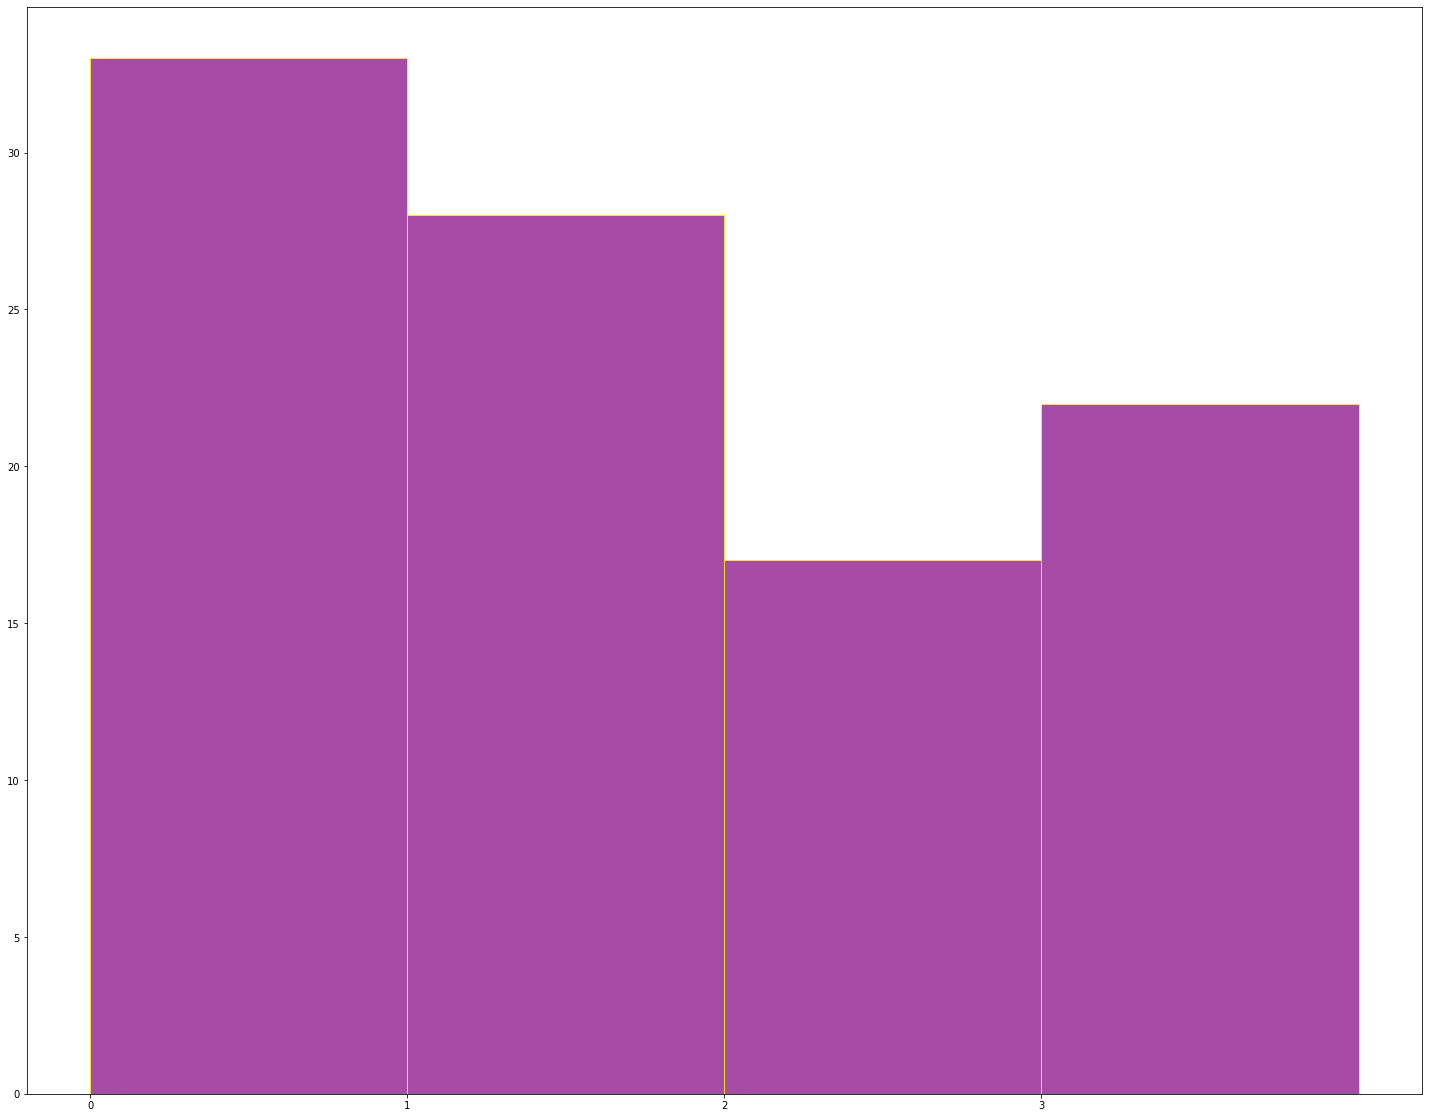

In [54]:
plt.hist(labels, bins=range(5), color='purple', edgecolor='yellow', alpha=0.7)
plt.xticks(range(4))
plt.grid(False)
plt.show()

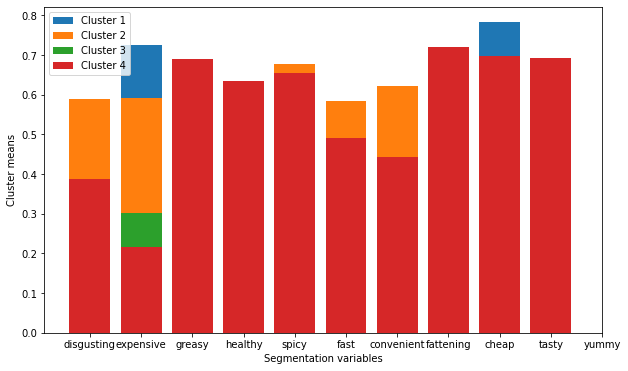

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD.x is a numpy array with the segmentation variables
# Replace this with loading your actual data
kmeans = KMeans(n_clusters=4, random_state=0).fit(MD_x)

# Get the cluster labels for each observation
labels = kmeans.labels_

# Get the cluster means for each attribute
means = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
for i in range(4):  # Assuming there are 4 clusters
    cluster_means = means[i, :]
    plt.bar(np.arange(len(cluster_means)), cluster_means, label=f"Cluster {i+1}")

# Assuming "yummy" is the missing label
labels = ["disgusting", "expensive", "greasy", "healthy", "spicy", "fast", "convenient", "fattening", "cheap", "tasty", "yummy"]

plt.xticks(np.arange(11), labels)
plt.xlabel("Segmentation variables")
plt.ylabel("Cluster means")
plt.legend()
plt.show()





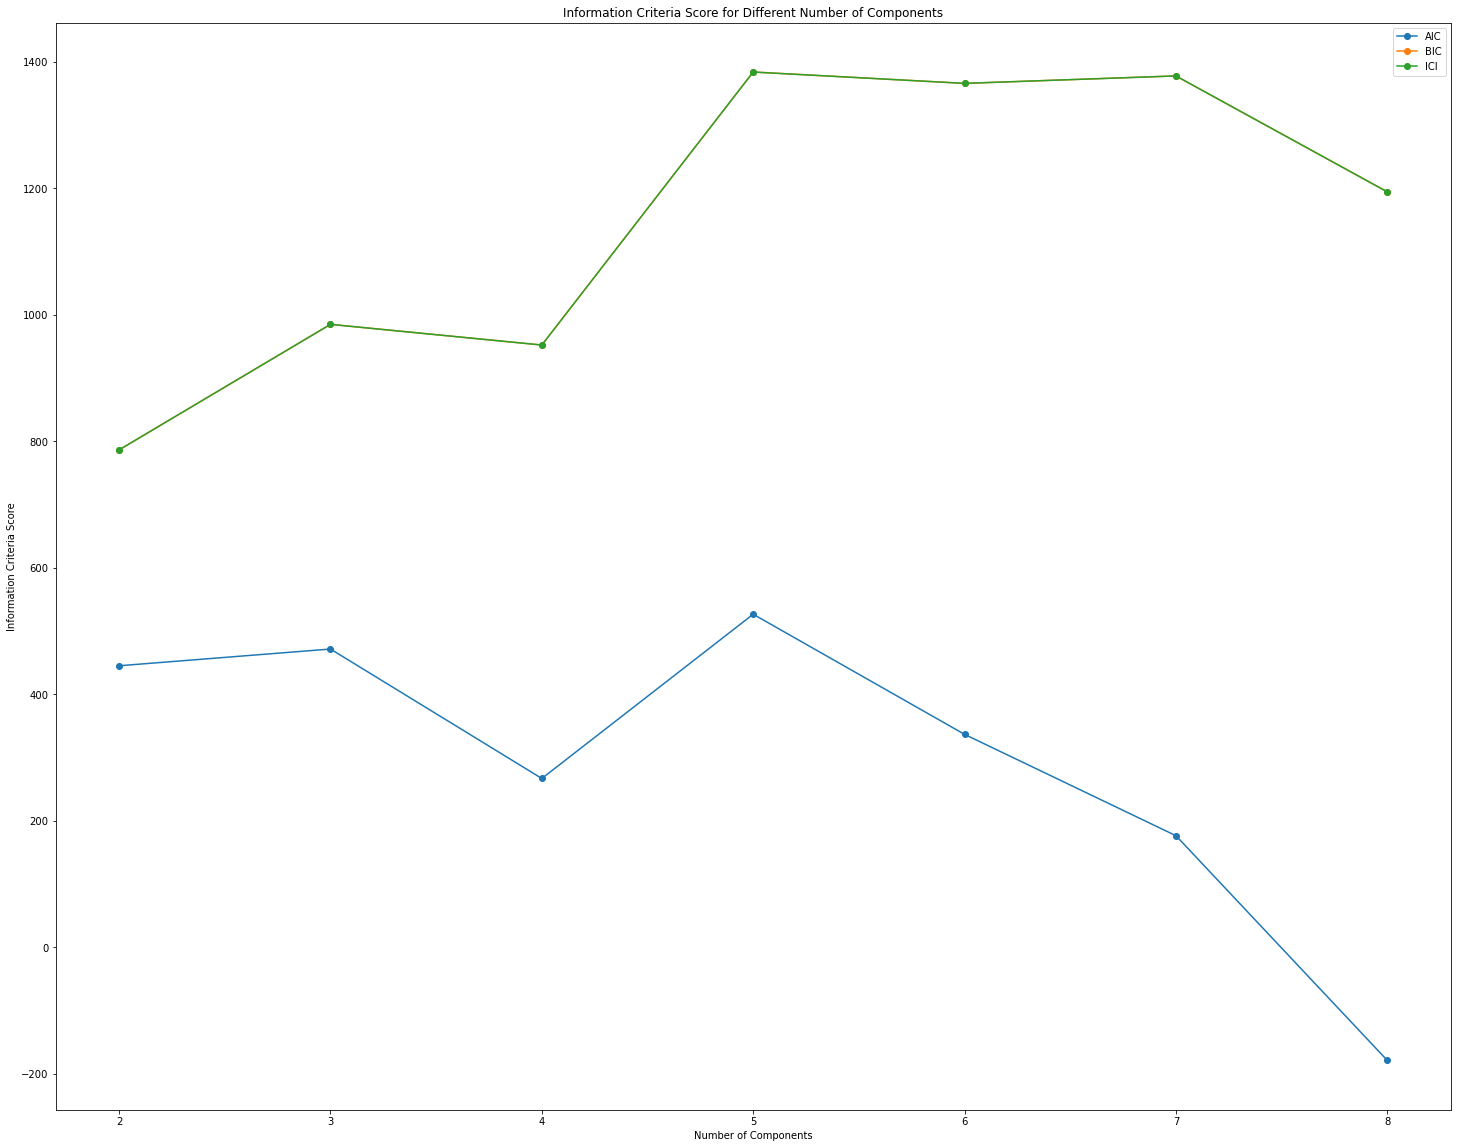

Optimal Number of Components: 2


In [47]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming MD.x is a DataFrame with your features
# Replace this with loading your actual data
MD_x = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(1, 11)])

# Set random seed for reproducibility
np.random.seed(1234)

# Number of components (equivalent to k in R's stepFlexmix)
n_components = range(2, 9)

# Number of random restarts
n_init = 10

# Fit Gaussian Mixture Models for different number of components
aic_scores = []
bic_scores = []
icl_scores = []
for n in n_components:
    gmm = GaussianMixture(n_components=n, n_init=n_init, random_state=1234)
    gmm.fit(MD_x)
    aic_scores.append(gmm.aic(MD_x))
    bic_scores.append(gmm.bic(MD_x))

    # Note: Scikit-Learn's GMM does not have ICL directly, you might need to calculate it manually
    
# Plot AIC, BIC, and ICL scores to choose the number of components
plt.plot(n_components, aic_scores, marker='o', label='AIC')
plt.plot(n_components, bic_scores, marker='o', label='BIC')
plt.plot(n_components, bic_scores, marker='o', label='ICl')
# Plot ICL scores if available

plt.xlabel('Number of Components')
plt.ylabel('Information Criteria Score')
plt.title('Information Criteria Score for Different Number of Components')
plt.legend()
plt.show()

# Choose the number of components with the minimum BIC score
optimal_components = n_components[np.argmin(bic_scores)]
print(f'Optimal Number of Components: {optimal_components}')

# Fit the final GMM with the optimal number of components
final_gmm = GaussianMixture(n_components=optimal_components, n_init=n_init, random_state=1234)
MD_x['Segment'] = final_gmm.fit_predict(MD_x)



In [55]:
data =pd.read_csv('mcdonalds.csv') 
scores = {'AIC': [], 'BIC': []}
models = []

for k in range(2, 9):
    data_numeric = data.select_dtypes(include='number')
    model = GaussianMixture(n_components=k, n_init=10).fit(data_numeric)

    models.append(model)
    scores['AIC'].append(model.aic(data_numeric))
    scores['BIC'].append(model.bic(data_numeric))


results_df = pd.DataFrame(scores, index=range(2, 9))
print(results_df)


            AIC           BIC
2  11617.140760  11643.547688
3  11583.775504  11626.026590
4  11555.475351  11613.570593
5  11549.230275  11623.169674
6  11548.274027  11638.057583
7  11549.571367  11655.199080
8  11548.038594  11669.510465


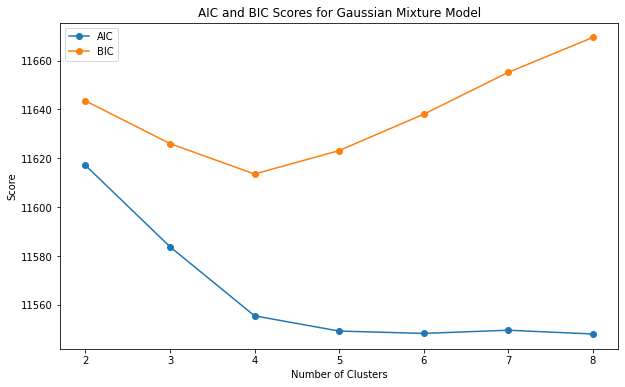

In [56]:

plt.figure(figsize=(10, 6))
for score_name in scores:
    plt.plot(range(2, 9), scores[score_name], marker='o', label=score_name)

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()


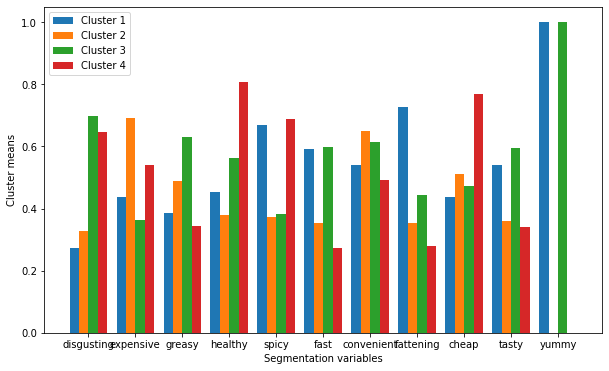

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD.x is a numpy array with the segmentation variables
# Replace this with loading your actual data
kmeans = KMeans(n_clusters=4, random_state=0).fit(MD_x)

# Get the cluster means for each attribute
means = kmeans.cluster_centers_

# Create a segment profile plot using a bar chart
plt.figure(figsize=(10, 6))

# Assuming there are 4 clusters
for i in range(means.shape[0]):
    cluster_means = means[i, :]
    plt.bar(np.arange(len(cluster_means)) + i * 0.2, cluster_means, width=0.2, label=f"Cluster {i+1}")

# Assuming "yummy" is the missing label
labels = ["disgusting", "expensive", "greasy", "healthy", "spicy", "fast", "convenient", "fattening", "cheap", "tasty", "yummy"]

plt.xticks(np.arange(len(labels)) + 0.3, labels)
plt.xlabel("Segmentation variables")
plt.ylabel("Cluster means")
plt.legend()
plt.show()


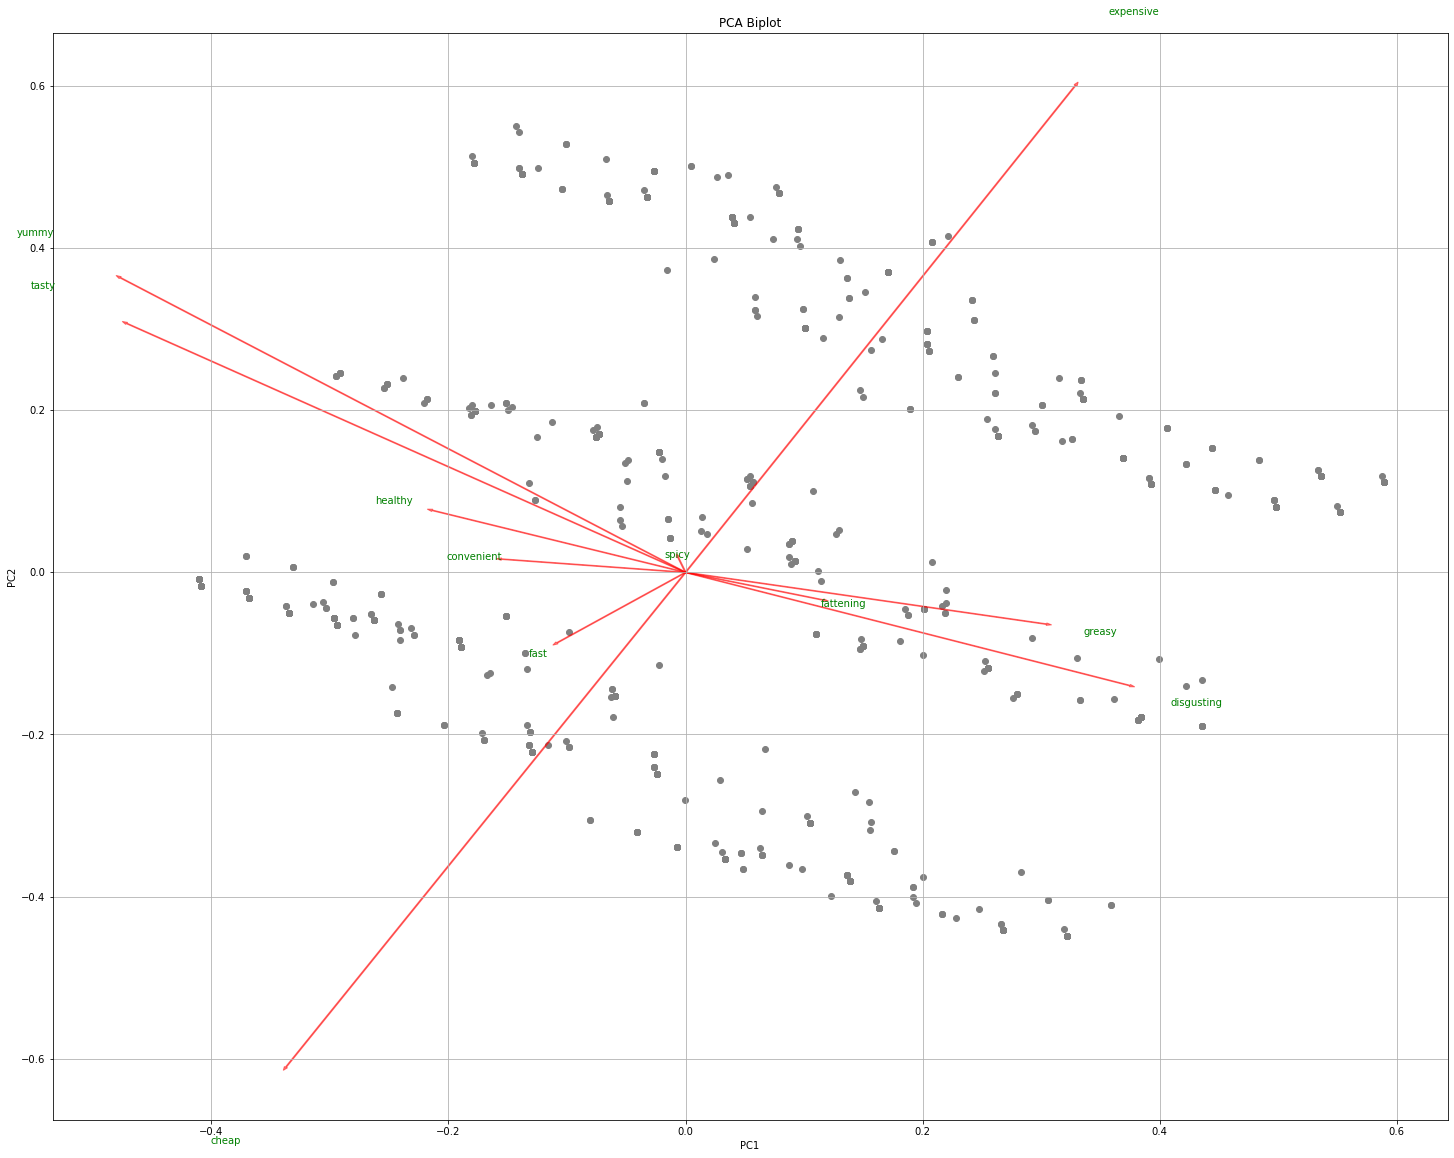

In [63]:

# Read the CSV file into a DataFrame
mcdonalds = pd.read_csv(file_path)

# Extract the segmentation variables and convert them to a matrix
MD_x = mcdonalds.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)

# Assuming MD_x is a result of PCA
pca = PCA()
pca.fit(MD_x)

# Get the transformed data
transformed_data = pca.transform(MD_x)

# Convert the transformed data to a DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])

# Create a biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c='grey')

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

# Call the function
biplot(transformed_data[:, :2], np.transpose(pca.components_[:2, :]), labels=MD_x.columns)

# Customize the plot
plt.title('PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

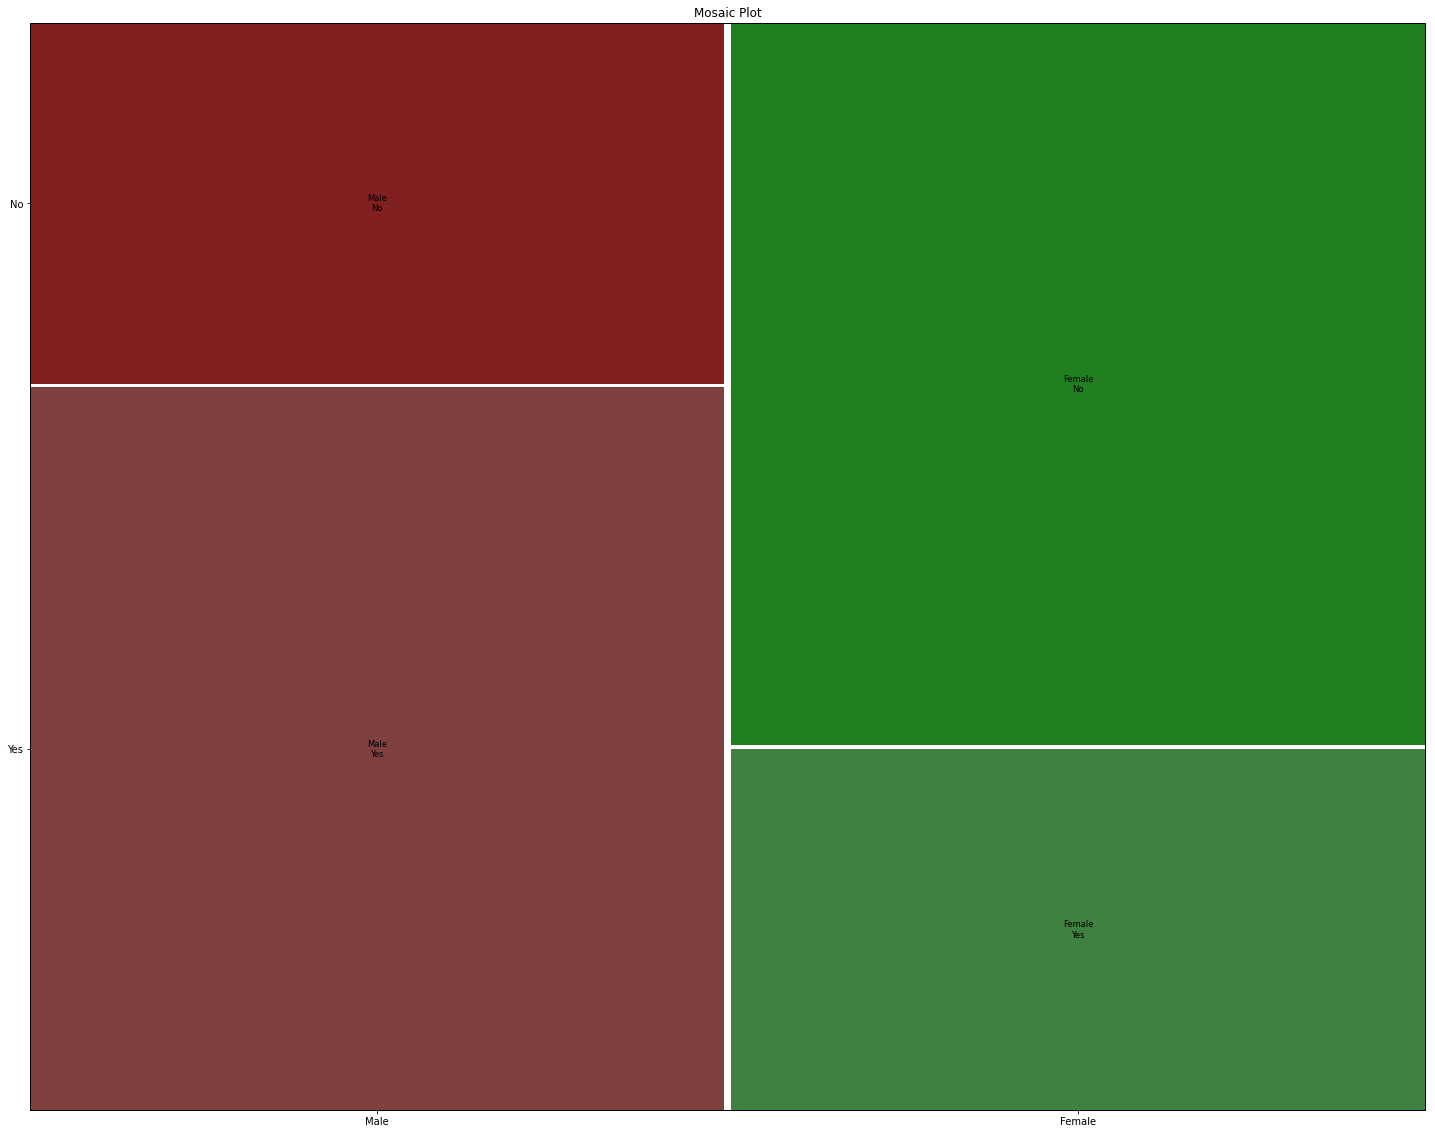

In [65]:
from statsmodels.graphics.mosaicplot import mosaic
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
example_df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(example_df, ['Gender', 'Preference'], title='Mosaic Plot')

plt.show()